In [141]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import pylab as pl
import math

In [142]:
user_database = [
    {"full_name": "George Uwagbale", "email": "uwagbalegeorge@gmail.com", "password": "", "age": 22}
]

image_database = [
    {"name": "Gelede Headdress", "description": "", "category": 1, "path": "./img/gelede_headdress.jpeg"},
    {"name": "Male NOK Head", "description": "", "category": 1,
     "path": "./img/male_nok_head.jpg"},
    {"name": "Female NOK Head", "description": "", "category": 1,
     "path": "./img/female_nok_head.jpg"},
    {"name": "Benin Head", "description": "", "category": 1,
     "path": "./img/benin_head.jpg"},
    {"name": "Igbo Ukwu", "description": "", "category": 1,
     "path": "./img/igbo_ukwu.jpg"},
    {"name": "Royal Court Chief", "description": "", "category": 1,
     "path": "./img/royal_court_chief.jpg"},
    {"name": "Yoruba Human face", "description": "", "category": 1,
     "path": "./img/yoruba_human_face.jpg"},
    {"name": "Traditional Bell", "description": "", "category": 1,
     "path": "./img/traditional_bell.jpg"}
]


In [143]:
def login(email: str, password: str) -> bool:
    for user in user_database:
        if user.get("email") == email and user.get("password") == password and user.get("age") >= 18:
            print("user logged in successfully!!")
            return True

    print("Incorrect email or password")
    return False



In [144]:
def show_categories() -> int:
    # print("1. Traditional Art\n2. Modern Art\n3. Contemporary Art")
    chosen_category: int = int(input("Categories: \n"
                                     "1. Traditional Art\n"
                                     "2. Modern Art\n"
                                     "3. Contemporary Art: "
                                     ""))
    
    if chosen_category == 1:
        return chosen_category
    elif chosen_category == 2:
        return chosen_category
    elif chosen_category == 3:
        return chosen_category
    else:
        print("Invalid Option.")

In [145]:
images = []
def show_images(category: int):
    for image in image_database:
        if image.get("category") == category:
            images.append(
                {
                    "name":image.get("name"), "image": cv.imread(image.get("path"), 0)
                }
            )
            
    # Number of columns
    columns = 4
    
    # Calculate number of rows needed
    rows = math.ceil(len(images) / columns)
            
    for i in range(len(images)):
        plt.subplot(rows, columns, i+1)
        plt.title(f'{i+1}')
        plt.imshow(images[i].get("image"))
    
    plt.show()    
    
    for i in range(len(images)):
        print(f'{i+1}. {images[i].get("name")}')

In [146]:
def image_translation(image: np.ndarray, x: int, y: int) -> np.ndarray:
    rows, cols = image.shape
    M = np.float32([[1, 0, x], [0, 1, y]])
    return cv.warpAffine(image, M, (cols, rows))

In [147]:
def image_reflection(image: np.ndarray, x: int, y: int) -> np.ndarray:
    rows, cols = image.shape
    M = np.float32([[1, 0, 100], [-1, 0, x], [0, -1, y]])
    return cv.warpPerspective(image, M, (cols, rows))

In [148]:
def image_rotation(image: np.ndarray, angle: int) -> np.ndarray:
    rows, cols = image.shape
    M = cv.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    return cv.warpAffine(image, M, (cols, rows))

In [149]:
def image_cropping(image: np.ndarray, x: int, y: int, w: int, h: int) -> np.ndarray:
    return image[y:y+h, x:x+w]

In [150]:
def sheared_image_x_axis(image: np.ndarray, shear_factor: float) -> np.ndarray:
    rows, cols = image.shape
    M = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    return cv.warpAffine(image, M, (cols, rows))

In [151]:
def sheared_image_y_axis(image: np.ndarray, shear_factor: float) -> np.ndarray:
    rows, cols = image.shape
    M = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    return cv.warpAffine(image, M, (cols, rows))

In [152]:
def gaussian_image_blur(image: np.ndarray, kernel_size: int) -> np.ndarray:
    return cv.GaussianBlur(image, (kernel_size, kernel_size), 0)

In [153]:
def median_image_blur(image: np.ndarray, kernel_size: int) -> np.ndarray:
    return cv.medianBlur(image, kernel_size)

In [154]:
def bilateral_image_blur(image: np.ndarray, kernel_size: int) -> np.ndarray:
    return cv.bilateralFilter(image, kernel_size, 75, 75)

In [155]:
def show_transformations():
    print("""
    1. Image Translation
    2. Image Reflection
    3. Image Rotation
    4. Image Cropping
    5. Sheared Image in X-axis
    6. Sheared Image in Y-axis
    7. Gaussian Image Blur
    8. Median Image Blur
    9. Bilateral Image Blur
    """)

In [156]:
def apply_transformation(transformation_index: int, img: np.ndarray):
    transformed_img = None
    if transformation_index == 1:
        x = int(input("Enter x: "))
        y = int(input("Enter y: "))
        transformed_img = image_translation(img, x, y)
        
    elif transformation_index == 2:
        x = int(input("Enter x: "))
        y = int(input("Enter y: "))
        transformed_img = image_reflection(img, x, y)
        
    elif transformation_index == 3:
        angle = int(input("Enter angle: "))
        transformed_img = image_rotation(img, angle)
        
    elif transformation_index == 4:
        x = int(input("Enter x: "))
        y = int(input("Enter y: "))
        w = int(input("Enter x: "))
        h = int(input("Enter y: "))
        transformed_img = image_cropping(img, x, y, w, h)
        
    elif transformation_index == 5:
        shear_factor = int(input("Enter shear factor: "))
        transformed_img = sheared_image_x_axis(img, shear_factor)
        
    elif transformation_index == 6:
        shear_factor = int(input("Enter shear factor: "))
        transformed_img = sheared_image_y_axis(img, shear_factor)
        
    elif transformation_index == 7:
        kernel_size = int(input("Enter kernel size: "))
        transformed_img = gaussian_image_blur(img, kernel_size)
        
    elif transformation_index == 8:
        kernel_size = int(input("Enter kernel size: "))
        transformed_img = median_image_blur(img, kernel_size)
        
    elif transformation_index == 9:
        kernel_size = int(input("Enter kernel size: "))
        transformed_img = bilateral_image_blur(img, kernel_size)
        
    else:
        print("Invalid Option!")
        
    plt.subplot(1, 1, 1)
    plt.title("Transformed")
    plt.imshow(transformed_img)
        

user logged in successfully!!
1. Gelede Headdress
2. Male NOK Head
3. Female NOK Head
4. Benin Head
5. Igbo Ukwu
6. Royal Court Chief
7. Yoruba Human face
8. Traditional Bell

    1. Image Translation
    2. Image Reflection
    3. Image Rotation
    4. Image Cropping
    5. Sheared Image in X-axis
    6. Sheared Image in Y-axis
    7. Gaussian Image Blur
    8. Median Image Blur
    9. Bilateral Image Blur
    


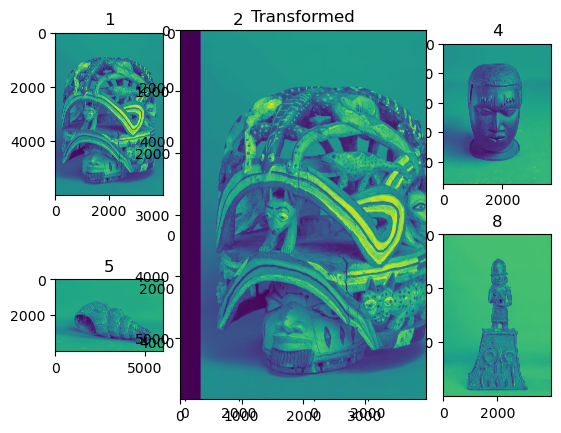

In [157]:

email_: str = input("Enter email: ")
password_: str = input("Enter password: ")
if login(email_, password_):
    category_: int = show_categories()
    show_images(category_)
    
    image_index: int = int(input("Enter image index: "))
    _image = images[image_index - 1]
    show_transformations()
    _transformation = int(input("Enter transformation index: "))
    apply_transformation(_transformation, _image.get("image"))
    
else:
    print("Login failed")

